# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__  As these data are from a large, random sample, these statistics are very relevant even though the distribution of the data is not normal. The mean is likely very close to the population mean due to Central Limit Theorem and the large sample size. The population standard deviation can be estimated from the sample standard deviation using Bessel's correction. 

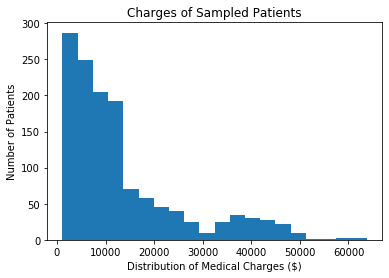

In [4]:
_ = plt.hist(medical.charges, bins=20)
_ = plt.xlabel('Distribution of Medical Charges ($)')
_ = plt.ylabel('Number of Patients')
_ = plt.title('Charges of Sampled Patients')
plt.show()

In [5]:
# sample mean and standard deviation
charges_sample_mean = np.mean(medical.charges)
charges_sample_std = np.std(medical.charges)
charges_sample_mean, charges_sample_std

(13270.422265141257, 12105.484975561605)

In [6]:
# Estimated population standard deviation using Bessel's correction. 
charges_pop_est_std = np.std(medical.charges, ddof=1)
charges_pop_est_std

12110.011236693994

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  As the sample size is large and the sample was randomly chosen, the mean sample charge is likely close to the mean patient charge due to the Central Limit Theorem. We can calculate a confidence interval for the mean patient charge to see if $12,000 falls into or below the confidence interval. 

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__The administrator is not concerned about high charges, only low ones. A one-sided interval would be best. Use the t distribution as we don't know anything about the population, just the sample.    
The lower end of our 95% confidence interval is above the threshold that concerns the administrator. This process will result in intervals that include the population mean 95% of the time, so it is likely that the true average charge is above $12,000. This should reassure the administrator. 

In [17]:
dof = 1337
# for one-tailed test, alpha is all in one tail. 
alpha = 0.05
# Critical value
critical_t_value_95 = t.ppf(1-alpha, dof)
critical_t_value_95

1.6459941145571317

In [18]:
lower_end_95 = charges_sample_mean - (critical_t_value_95 * (charges_sample_std / np.sqrt(dof+1)))
lower_end_95

12725.690859802164

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ __Null Hypothesis:__ Insurance makes no difference in charges. Patients with and without insurance are charged same amount.  
__Alternative Hypothesis:__ Patients with insurance are charged a different amount than patients without insurance. 

__Assumption:__ Variances are the same. 

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [9]:
# Divide the data into groups. 
no_ins = medical[medical['insuranceclaim']==0]['charges']
ins = medical[medical['insuranceclaim']==1]['charges']

In [10]:
# Calculate means for manual t statistic. 
no_ins_mean = np.mean(no_ins)
ins_mean = np.mean(ins)
no_ins_mean, ins_mean

(8821.421892306294, 16423.928276537663)

In [11]:
# Calculate sample sizes for manual t statistic. 
no_ins_len = len(no_ins)
ins_len = len(ins)
no_ins_len, ins_len

(555, 783)

In [12]:
# Calculate variances for manual t statistic. 
no_ins_var = np.var(no_ins)
ins_var = np.var(ins)
no_ins_var, ins_var

(41482614.44965368, 197036140.77172482)

In [13]:
# Calculate t-test statistic value.
s_pooled_num = ((ins_len - 1) * ins_var) + ((no_ins_len - 1) * no_ins_var)
df = ins_len + no_ins_len - 2
s_pooled = np.sqrt(s_pooled_num / df)
t_test = (ins_mean - no_ins_mean) / (s_pooled * np.sqrt((1 / ins_len) + (1 / no_ins_len)))
t_test

11.901306943555385

In [14]:
# Probability of getting this t-test statistic.
p = 1 - t.cdf(t_test,df=df)
p = 2*p
p

0.0

In [15]:
# Use scipy ttest_ind to perform two tailed test and compare results with manual results. 
t_value, p_value = ttest_ind(ins, no_ins)
t_value, p_value

(11.893299030876712, 4.461230231620717e-31)

__A:__ Results are very close, slightly different due to rounding. Interestingly, ttest_ind calculated a miniscule probability while t.cdf reported zero probability.   
Results show we can reject null hypothesis and that charges for two groups are different. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__ equal_var=False

In [16]:
# Use scipy ttest_ind to perform two tailed test and compare results with hand calculated results. 
t_value, p_value = ttest_ind(ins, no_ins, equal_var=False)
t_value, p_value

(13.298031957975649, 1.1105103216309125e-37)

__A:__ Even with unequal variances, the t test value is still very large and the p value miniscule. We still reject the null hypothesis and conclude the charges for the two groups are different. 

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  There is no statistical test in scipy for a z-test from a sample. A z-test should only be used where the population standard deviation is known. This rarely happens. The t-test is essentially a z-test with fatter tails, and gets closer to the normal distribution of the z-test as the sample size gets larger. For large samples, the t-test is very close to a z-test. This makes sense as the standard deviation of the sample approaches that of the population as the sample size increases. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test